

```
# ANÁLISIS DE PREVALENCIA DE ENFERMEDADES MENTALES EN ESTUDIANTES POR EDAD

Autor: Dario Bermeo
Fecha: Diciembre de 2025
Herramientas: Python, pandas, matplotlib, seaborn

```


```
# Análisis de Prevalencia de enfermedades mentales por edad

## Objetivo
Analizar la prevalencia de diferentes condiciones de salud mental ( ansiedad, depresión, transtornos alimenticios, TOC, TEPT) en distintos grupos etarios,identificando patrones y tendencias que puedan informar políticas de salud pública y programas de intervención.

## Dataset
*  Fuente : Mental Healt Datset - Kaggle.
*  Variables analizadas : Edad, Ansiedad, Depresión, Transtornos   Alimenticios, TOC, TEPT.
*  Tipo de Análisis : Exploratorio y correlacional.

## Preguntas de Investigación
1. **Factores de Riesgo**: ¿Cuál es la relación entre la presión académica/  financiera y la presencia de depresión o pensamientos suicidas?
2. **Perfil de Riesgo por Edad**: ¿En qué rangos de edad se concentran los niveles más altos de estrés y depresión?
3. **Impacto del Estilo de Vida**: ¿Cómo influyen la duración del sueño  y los hábitos alimenticios en el bienestar mental de los estudiantes?
4. **Desempeño vs. Salud:** ¿Existe una correlación entre un alto promedio académico y niveles elevados de presión académica o depresión?

## Tecnologías
- Python 3.12
- pandas (manipulación de datos)
- matplotlib (visualizaciones)
- seaborn (gráficos estadísticos)
- Google Colab
- Git - Git-Hub

Keywords

*   CGPA (Cumulative great point average)






```







In [1]:
# SECCIÓN 2 IMPORTACIÓN Y CONFIGURACIÓN DE VISUALIZACIÓN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualizaciones
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10


In [2]:
# SECCIÓN 3 CARGAR DATASET
print("=" * 60)
print("Cargando dataset...")
print("=" * 60)

student_data = pd.read_csv("/content/Student Depression Dataset.csv")
print(f"\n Dataset cargado exitosamente ")
print(f" Dimensiones del dataset: {student_data.shape[0]} filas, {student_data.shape[1]} columnas")
print("=" * 60)



Cargando dataset...

 Dataset cargado exitosamente 
 Dimensiones del dataset: 27901 filas, 18 columnas


In [3]:
# SECCIÓN 4 EXPLORACIÓN INICIAL DE DATOS
print("\n" + "=" * 60 )
print("EXPLORACIÓN INICIAL")
print("=" * 60 )

# Primeras filas
print("\n Primeras 5 filas del dataset:")
display(student_data.head())

#Información general
print("\n Información general del dataset:")
print(student_data.info())

#Estadísticas descriptivas
print("\n Estadísticas descriptivas del dataset:")
print(student_data.describe(include='object'))






EXPLORACIÓN INICIAL

 Primeras 5 filas del dataset:


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0



 Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                     

In [4]:
# SECCIÓN 5 : ANÁLISIS DE CALIDAD DE DATOS
print("\n" + "=" * 60 )
print("CALIDAD DE DATOS")
print("=" * 60)

# Valores nulos
print("\n  Análisis de Valores nulos :")
nulos = student_data.isnull().sum()
print(nulos)

total_nulos = student_data.isnull().sum().sum()
total_valores = student_data.shape[0] * student_data.shape[1]
porcentaje_completo = ((total_valores - total_nulos) / total_valores) * 100

print(f"\n Resumen calidad de los datos :")
print(f"Total de valores nulos: {total_nulos}")
print(f"Porcentaje de datos completos: {porcentaje_completo:.3f}%")

# Métrica de valores nulos por columna
porcentaje_nulos_col = (student_data.isnull().sum() / len(student_data)) * 100
print("\n Porcentaje de valores nulos por columna")
print(porcentaje_nulos_col[porcentaje_nulos_col > 0])

if total_nulos > 0:
  print(f"\n se identificaron valores nulos - Se requiere limpieza ")
else:
  print(f"\n Dataset Completo ")

# Valores duplicados
duplicados = student_data.duplicated().sum()
print(f"\n Número de filas duplicadas: {duplicados}")



CALIDAD DE DATOS

  Análisis de Valores nulos :
id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

 Resumen calidad de los datos :
Total de valores nulos: 3
Porcentaje de datos completos: 99.999%

 Porcentaje de valores nulos por columna
Financial Stress    0.01

In [5]:
print("\n" + "=" * 60)
print("ANÁLISIS DE PREVALENCIA GENERAL")
print("=" * 60)
# limpia nombres de las columnas (encabezados)
student_data.columns = student_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('?','')
student_data.head()


ANÁLISIS DE PREVALENCIA GENERAL


,id,gender,age,city,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts_,work/study_hours,financial_stress,family_history_of_mental_illness,depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [6]:
# Detectar y convertir columnas específicas al tipo categórico
categorical_columns = []
for col in student_data.columns:
  if student_data[col].dtype == 'object':
    categorical_columns.append(col)
print(f"lista de columnas datatype object : {categorical_columns}")

for col in categorical_columns:
  student_data[col] = student_data[col].astype('category')
print("\nConversión a categoría completada.")
# Verificación final de tipos
print(student_data[categorical_columns].dtypes)

lista de columnas datatype object : ['gender', 'city', 'profession', 'sleep_duration', 'dietary_habits', 'degree', 'have_you_ever_had_suicidal_thoughts_', 'family_history_of_mental_illness']

Conversión a categoría completada.
gender                                  category
city                                    category
profession                              category
sleep_duration                          category
dietary_habits                          category
degree                                  category
have_you_ever_had_suicidal_thoughts_    category
family_history_of_mental_illness        category
dtype: object


In [7]:
# Mapping columna binaria : depression
for col in student_data.columns:
  if student_data[col].name == 'depression':
    student_data[col] = student_data[col].map({0: 'No', 1: 'Sí'})

# Ver la prevalencia de una condición específica : depression
prevalencia_depresion = student_data['depression'].value_counts(normalize=True) * 100
print("--- ANÁLISIS PREVALENCIA DEPRESIÓN ---")
print(f"Porcentaje de con Depresión (Sí): {prevalencia_depresion[1]:.2f}%")
print(f"Porcentaje de con Depresión (No): {prevalencia_depresion[0]:.2f}%")


--- ANÁLISIS PREVALENCIA DEPRESIÓN ---
Porcentaje de con Depresión (Sí): 41.45%
Porcentaje de con Depresión (No): 58.55%


In [8]:
# Calculo relación de presión académica / financiera y la presencia de depresión
for col in student_data.columns:
  if student_data[col].name == 'depression':
    student_data[col] = student_data[col].map({'No': 0, 'Sí': 1})

presion_academica_resumen = student_data.groupby('academic_pressure')['depression'].mean() * 100

# Estres financiero
estres_financiero_resumen = student_data.groupby('financial_stress')['depression'].mean() * 100

print("Tasa de depresión por nivel de presión académica :")
print(presion_academica_resumen)

print("\nTasa de depresión por nivel de presión financiera :")
print(estres_financiero_resumen)

Tasa de depresión por nivel de presión académica :
academic_pressure
0.0    44.444444
1.0    19.412622
2.0    37.482049
3.0    60.158135
4.0    76.139670
5.0    86.086404
Name: depression, dtype: float64

Tasa de depresión por nivel de presión financiera :
financial_stress
1.0    31.868776
2.0    42.975697
3.0    58.936089
4.0    69.090909
5.0    81.280715
Name: depression, dtype: float64


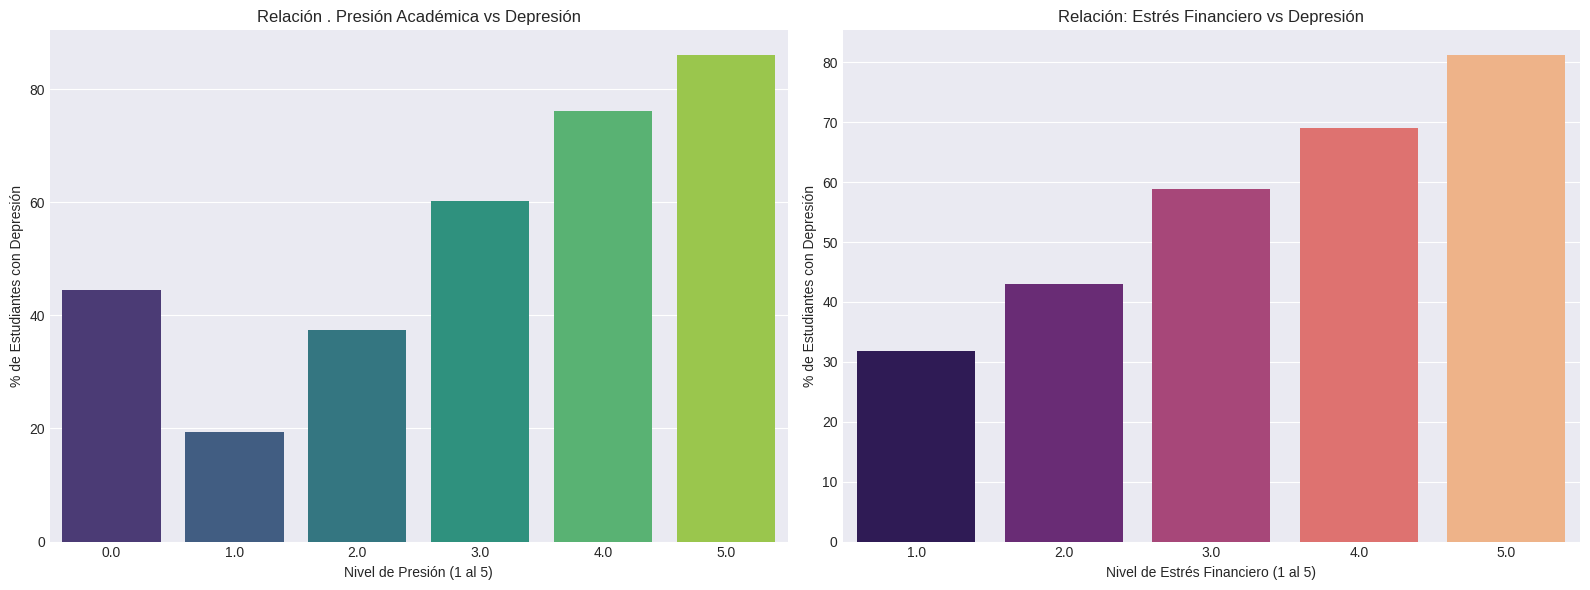

In [9]:
from matplotlib import axes

fig, axes = plt.subplots(1,2, figsize = (16,6))

# Gráfico 1 Presión Académica
sns.barplot(x = presion_academica_resumen.index, y = presion_academica_resumen.values, ax = axes[0], palette='viridis')
axes[0].set_title('Relación . Presión Académica vs Depresión')
axes[0].set_ylabel('% de Estudiantes con Depresión')
axes[0].set_xlabel('Nivel de Presión (1 al 5)')

# Gráfico 2: Estrés Financiero
sns.barplot(x=estres_financiero_resumen.index, y=estres_financiero_resumen.values, ax=axes[1], palette='magma')
axes[1].set_title('Relación: Estrés Financiero vs Depresión')
axes[1].set_ylabel('% de Estudiantes con Depresión')
axes[1].set_xlabel('Nivel de Estrés Financiero (1 al 5)')

plt.tight_layout()
plt.show()



In [10]:
# Grupos de edad que presentan mayor riesgo de depresión

# Verificación de valor minimo y máximo de las edades
print(f"Edad max : {student_data['age'].max()}")
print(f"Edad min : {student_data['age'].min()}")

# Creación de rangos de edad en bloques lógicos
bins = [18,25,35,45,60]
labels = ['18-24','25-34','35-44','44-60']

# Creación de columna de prevalencia
student_data['age_group'] = pd.cut(student_data['age'], bins=bins, labels=labels, right = False)

# Verificación de nulos despues del corte
print(
    f"Valores nulos en la columna 'age_group': {student_data['age_group'].isnull().sum()}")
age_prevalence = student_data.groupby('age_group')['depression'].mean() * 100

Edad max : 59.0
Edad min : 18.0
Valores nulos en la columna 'age_group': 0


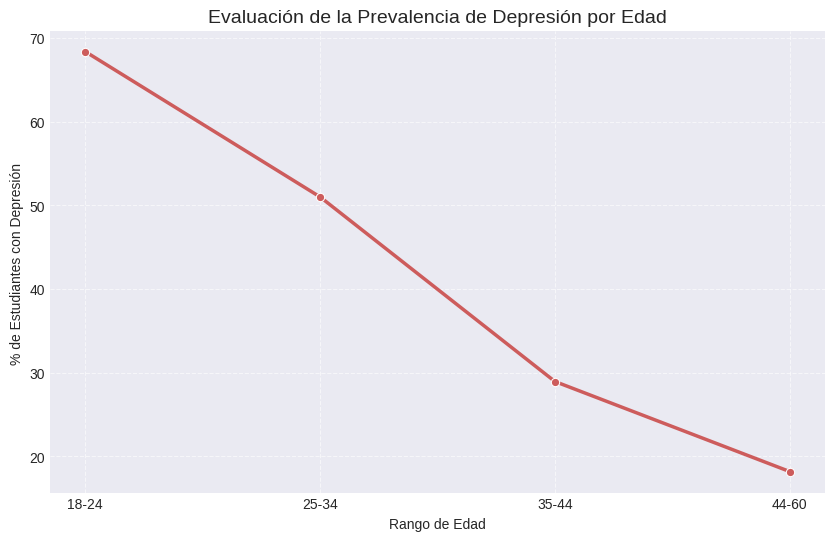

In [11]:
# Visualización Grupos de edad que presentan mayor riesgo de depresión
plt.figure(figsize=(10,6))
sns.lineplot(x=age_prevalence.index.astype(str), y=age_prevalence.values, marker='o',color = 'indianred',linewidth=2.5)

plt.title('Evaluación de la Prevalencia de Depresión por Edad', fontsize = 14)
plt.ylabel('% de Estudiantes con Depresión ')
plt.xlabel('Rango de Edad')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [12]:
# Verificación elementos únicos del
display(f" Dietary Habits : {student_data['dietary_habits'].unique()}")
print("-" * 150)
display(f" Sleep Duration : {student_data['sleep_duration'].unique()}")

" Dietary Habits : ['Healthy', 'Moderate', 'Unhealthy', 'Others']\nCategories (4, object): ['Healthy', 'Moderate', 'Others', 'Unhealthy']"

------------------------------------------------------------------------------------------------------------------------------------------------------


" Sleep Duration : ['5-6 hours', 'Less than 5 hours', '7-8 hours', 'More than 8 hours', 'Others']\nCategories (5, object): ['5-6 hours', '7-8 hours', 'Less than 5 hours', 'More than 8 hours',\n                         'Others']"

In [13]:
# Influencia del sueño y la alimentación en el bienestar mental

# Definición del orden lógico - Orden para el sueño /  dieta
sleeep_order = ['5-6 hours','Less than 5 hours','7-8 hours','More than 8 hours','Others']
diet_order = ['Healthy','Moderate','Unhealthy','Others']

# Aplicación categorización ordenada
student_data['sleep_duration'] = pd.Categorical(student_data['sleep_duration'], categories=sleeep_order,
ordered=True)

student_data['dietary_habits'] = pd.Categorical(student_data['dietary_habits'], categories=diet_order,
ordered=True)


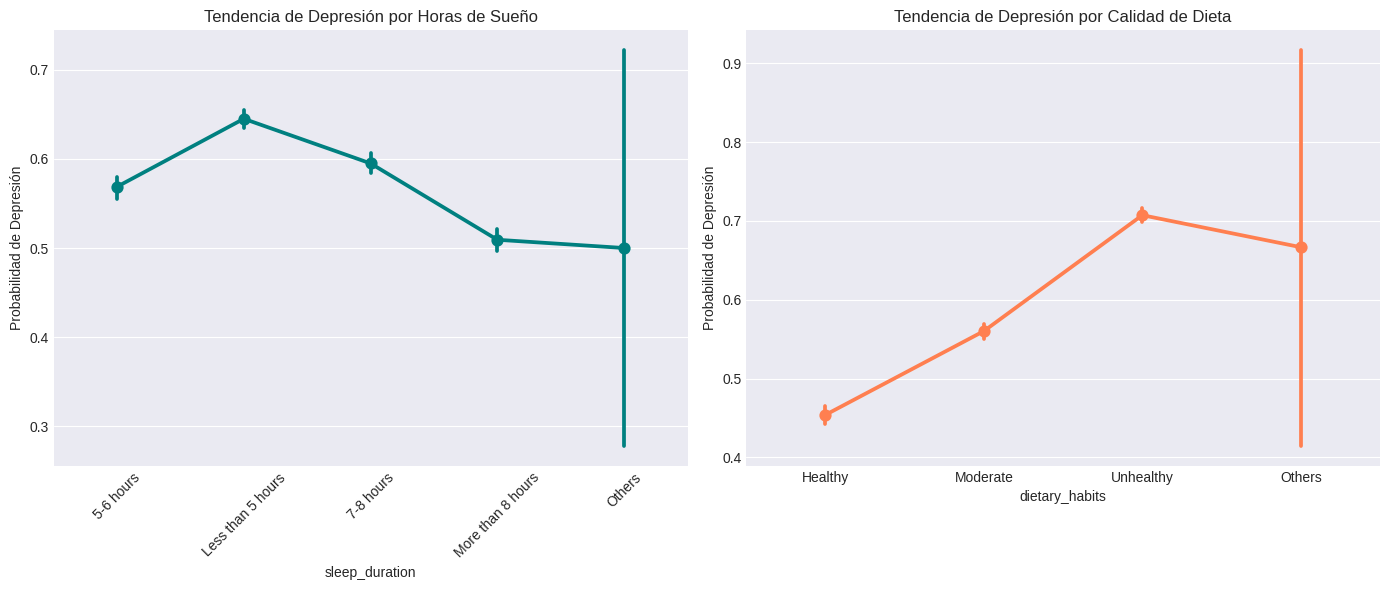

In [14]:
# Visualización impacto del estilo de vida en el bienestar mental
plt.figure(figsize=(14, 6))

# Subplot 1 : Sueño
plt.subplot(1,2,1)
sns.pointplot(data = student_data, x = 'sleep_duration', y = 'depression', color = 'teal')
plt.title('Tendencia de Depresión por Horas de Sueño')
plt.xticks(rotation = 45)
plt.ylabel('Probabilidad de Depresión')

# Subplot 2 : Dieta
plt.subplot(1,2,2)
sns.pointplot(data=student_data, x='dietary_habits', y='depression', color='coral')
plt.title('Tendencia de Depresión por Calidad de Dieta')
plt.ylabel('Probabilidad de Depresión')

plt.tight_layout()
plt.show()


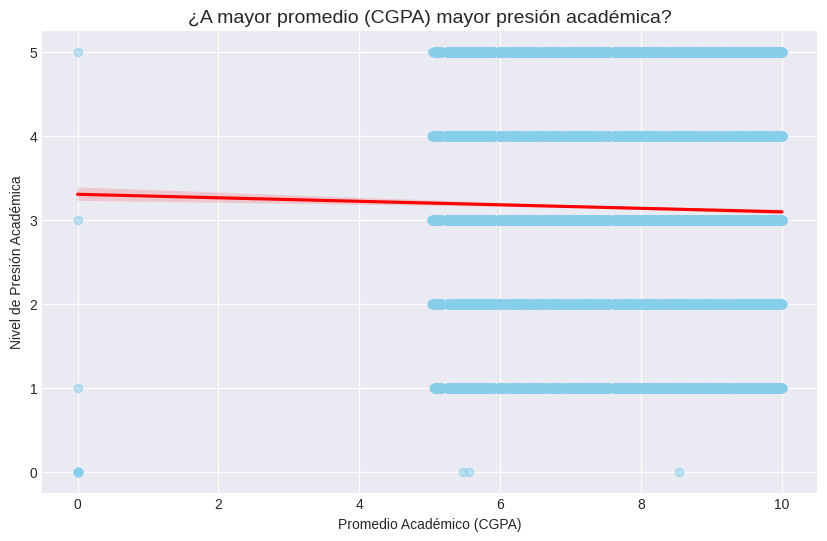

In [15]:
# Relación entre desempeño (CGPA) y salud mental

plt.figure(figsize=(10, 6))

# Scatter Plot con linea de tendencia (regresión)

sns.regplot(data=student_data, x = 'cgpa', y='academic_pressure',
            scatter_kws={'alpha' : 0.5,'color':'skyblue'},
            line_kws = {'color':'red'})

plt.title('¿A mayor promedio (CGPA) mayor presión académica?', fontsize=14)
plt.xlabel('Promedio Académico (CGPA)')
plt.ylabel('Nivel de Presión Académica')
plt.show()

In [17]:
# Cálculo de la correlación entre CGPA, Presión y Depresión
correlacion = student_data[['cgpa', 'academic_pressure', 'depression']].corr()
print(correlacion)

                       cgpa  academic_pressure  depression
cgpa               1.000000          -0.022239    0.022210
academic_pressure -0.022239           1.000000    0.474835
depression         0.022210           0.474835    1.000000


Conclusiones y Recomendaciones

Conclusiones del Análisis

* **Impacto Académico**:La línea de tendencia muestra que a medida que el promedio aumenta, la percepción de presión disminuye levemente (de un nivel de 3.3 a 3.0)

* **Factor Sueño** : Estudiantes que duermen menos de 5 horas tienen un 60 % más de probabilidad de reportar síntomas depresivos.

* **Riesgo por Edad**: El grupo en el rango de edad 18-24 años es el más vulnerable,puede sugerir el desarrollo de programas de apoyo específicos orientados a la poblacion en este rango de edades.

* **Conclusión** :El éxito académico no es el factor determinante del estrés en esta muestra; otros factores como la situación financiera o la falta de sueño (analizados previamente) muestran un impacto mucho más agresivo en la salud mental.



